In [142]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np 

# Import visualization tools
# --------------------------
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image, display 
#import pydotplus


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline 

In [143]:
# Here is the url provided for you
url="https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/breastcancer.csv"

In [144]:
# use pd.read_csv() to import the data
df=pd.read_csv(url)

In [145]:
df.head(5)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.990,10.380,122.800,"1,001.000",0.118,0.278,0.300,0.147,...,25.380,17.330,184.600,"2,019.000",0.162,0.666,0.712,0.265,0.460,0.119
1,M,842517,20.570,17.770,132.900,"1,326.000",0.085,0.079,0.087,0.070,...,24.990,23.410,158.800,"1,956.000",0.124,0.187,0.242,0.186,0.275,0.089
2,M,84300903,19.690,21.250,130.000,"1,203.000",0.110,0.160,0.197,0.128,...,23.570,25.530,152.500,"1,709.000",0.144,0.424,0.450,0.243,0.361,0.088
3,M,84348301,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,M,84358402,20.290,14.340,135.100,"1,297.000",0.100,0.133,0.198,0.104,...,22.540,16.670,152.200,"1,575.000",0.137,0.205,0.400,0.163,0.236,0.077


In [146]:
df.shape


(569, 32)

In [147]:
df.columns

Index(['diagnosis', 'id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [149]:
df.corr() 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000,0.075,0.100,0.073,0.097,-0.013,0.000,0.050,0.044,-0.022,...,0.082,0.065,0.080,0.107,0.010,-0.003,0.023,0.035,-0.044,-0.030
radius_mean,0.075,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
texture_mean,0.100,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
perimeter_mean,0.073,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
area_mean,0.097,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
smoothness_mean,-0.013,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
compactness_mean,0.000,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
concavity_mean,0.050,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
concave points_mean,0.044,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
symmetry_mean,-0.022,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438


<AxesSubplot:>

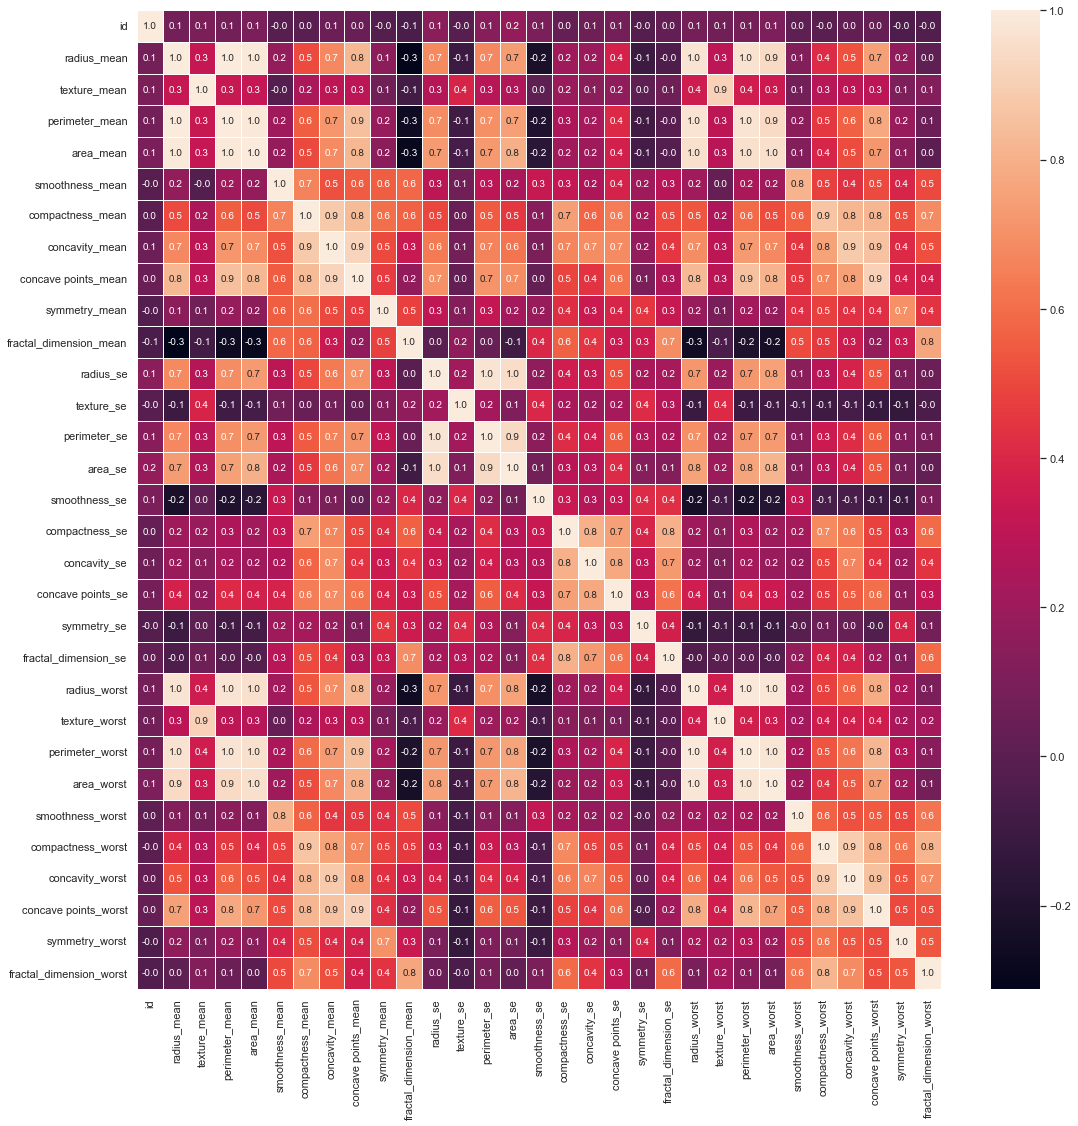

In [150]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [151]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B 
# y includes our labels and x includes our features
#y = df.diagnosis                          # M or B 
list = ['id','diagnosis']
x = df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.380,122.800,"1,001.000",0.118,0.278,0.300,0.147,0.242,0.079,...,25.380,17.330,184.600,"2,019.000",0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,"1,326.000",0.085,0.079,0.087,0.070,0.181,0.057,...,24.990,23.410,158.800,"1,956.000",0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,"1,203.000",0.110,0.160,0.197,0.128,0.207,0.060,...,23.570,25.530,152.500,"1,709.000",0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,"1,297.000",0.100,0.133,0.198,0.104,0.181,0.059,...,22.540,16.670,152.200,"1,575.000",0.137,0.205,0.400,0.163,0.236,0.077


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Number of Benign:  357
Number of Malignant :  212


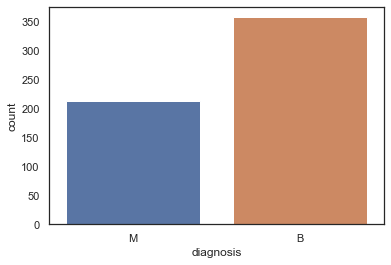

In [152]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [153]:
# lets get the frequency of cancer stages
#sns.countplot(df['diagnosis'],label="Count")
# Histograprint('Number of Benign: ',B)
#print('Number of Malignant : ',M)

# Histogram
How many times each value appears in dataset. This description is called the distribution of variable
Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
Frequency = number of times each value appears
Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.

%%https://www.nbshare.io/notebook/204214467/How-to-Plot-a-Histogram-in-Python/
%%https://datagy.io/histogram-python/
%%https://mode.com/example-gallery/python_histogram/

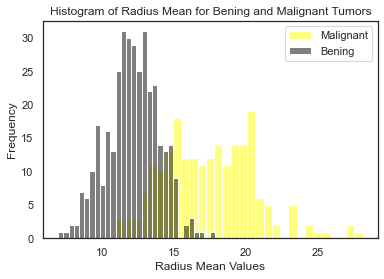

In [154]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,1,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,0,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

In [155]:
# Checking for missing data
# ------------------------
df.isnull().sum()

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [156]:
import plotly.offline as py
import plotly.graph_objs as go
null_feat = pd.DataFrame(len(df['id']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [157]:
# 2 datasets
M = df[(df['diagnosis'] == 'M')]
B = df[(df['diagnosis'] == 'B')]

#------------COUNT-----------------------
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [169]:
#sns.pairplot(df)
# here we will import the libraries used for machine learning


In [170]:
from pandas.plotting._misc import scatter_matrix

In [171]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = df["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(df[list(df.columns[1:11])], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

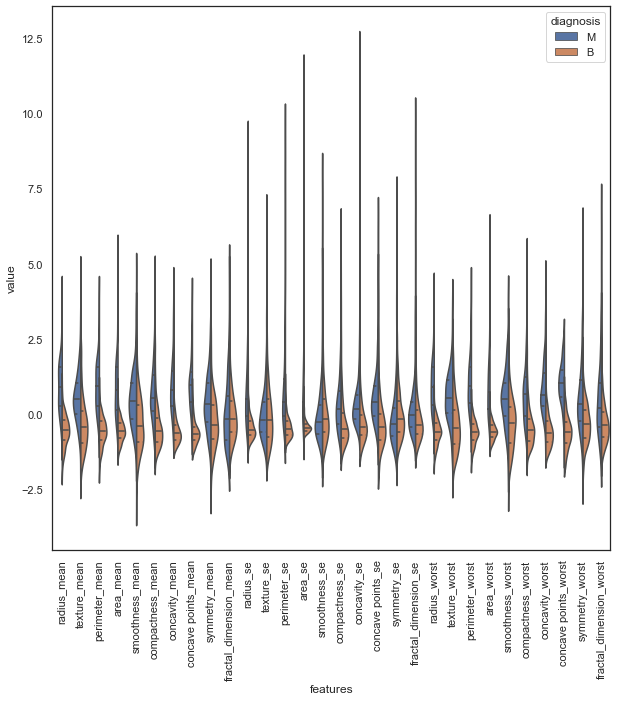

In [172]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

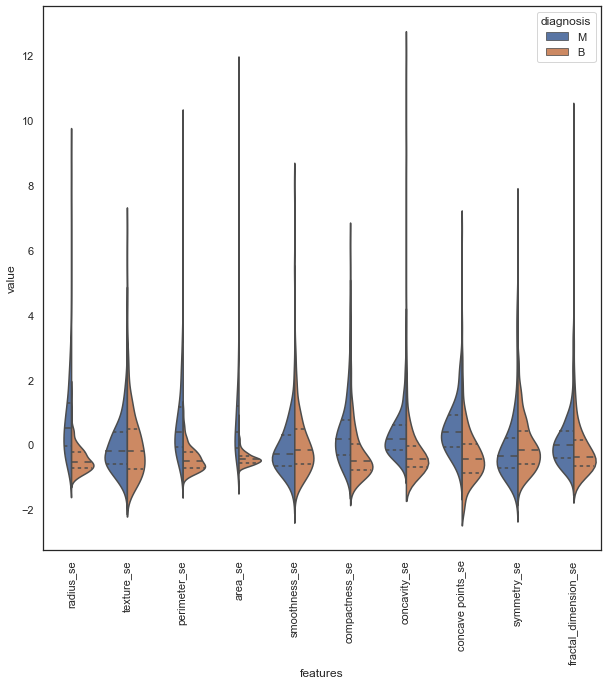

In [173]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

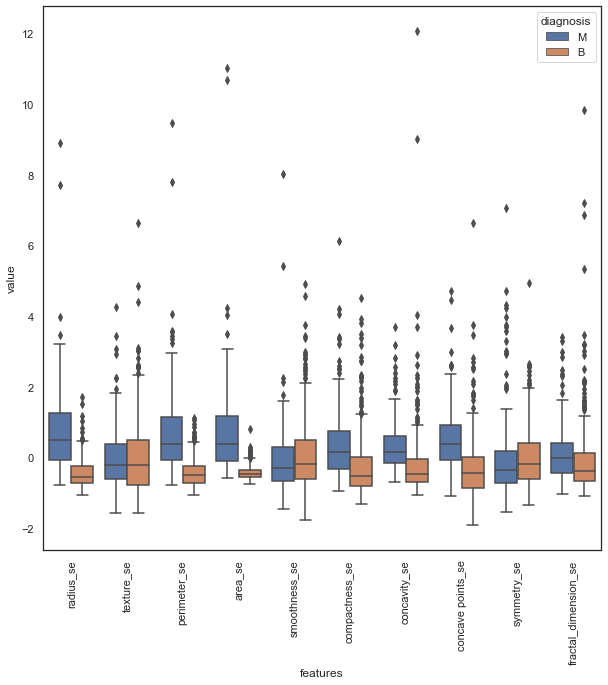

In [174]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

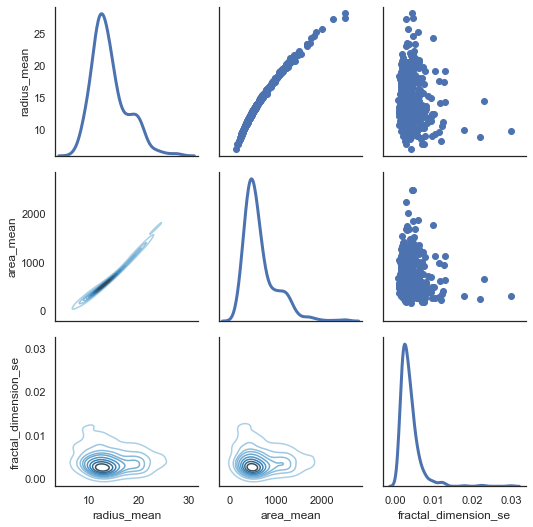

In [175]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = df.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

In [176]:

## =======================================================
#.     Importing Necessary Tools For the project
## =======================================================

import pandas as pd; import numpy as np
from sklearn.metrics import accuracy_score,  roc_auc_score
from sklearn.model_selection import train_test_split

# Import models that make the ensemble 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier

# Import Preprocessing tools
from sklearn.preprocessing import StandardScaler

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier

In [177]:
## ================================================
#    Read and explore the data
# =================================================
df = pd.read_csv(url)
print("*"*70)
df.info()
print("*"*70)
print(df.head())
print("*"*70)

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_s

In [178]:
# Checking for missing data
# ------------------------
df.isnull().sum()

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [179]:
list = ['id','diagnosis']
X = df.drop(list, axis=1)
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y,
                                    test_size= 0.3,
                                    random_state= 1)

In [125]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,11.520,14.930,73.870,406.300,0.101,0.078,0.043,0.029,0.188,0.062,...,12.650,21.190,80.880,491.800,0.139,0.158,0.180,0.096,0.266,0.078
58,13.050,19.310,82.610,527.200,0.081,0.038,0.001,0.004,0.182,0.055,...,14.230,22.250,90.240,624.100,0.102,0.062,0.002,0.011,0.244,0.063
476,14.200,20.530,92.410,618.400,0.089,0.111,0.051,0.031,0.151,0.060,...,16.450,27.260,112.100,828.500,0.115,0.343,0.251,0.134,0.253,0.079
529,12.070,13.440,77.830,445.200,0.110,0.090,0.038,0.028,0.166,0.066,...,13.450,15.770,86.920,549.900,0.152,0.163,0.162,0.074,0.278,0.081
422,11.610,16.020,75.460,408.200,0.109,0.117,0.071,0.045,0.189,0.063,...,12.640,19.670,81.930,475.700,0.141,0.217,0.230,0.111,0.279,0.074


In [126]:
# Scaling the data
# ---------------

scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [127]:
# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf= 0.13, 
                            random_state=1)

# Define the list classifiers
classifiers = [('Logistic Regression', logreg), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:20}: {:.3f}'.format(clf_name,  accuracy))

Logistic Regression : 0.971
K Nearest Neighbours: 0.965
Classification Tree : 0.854


In [128]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.959
